In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import time
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv("Roman_Urdu.csv", encoding = 'latin1')

# Drop rows with missing values
data.dropna(inplace=True)

# Remove unwanted symbols
data['tweets'] = data['tweets'].str.replace('[^\w\s]','')

# Split data into features and labels
X = data['tweets'].values
y = data['label'].values

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)
data.head(20)

,tweets,label
0,14 crore ke project ko banaa ke 14 arab khaa ...,H
1,Abhi bari hojao phir siyasat ki baat karna,H
2,Allah aap ko sehat zindagi dy taky aap choron...,H
3,antiii bhaii full gussy m h,H
4,Beshak bahar se parh ke aaya ho lekin bilawal...,H
5,"hum hai fb Jemee Usman kay king hum se, pang...",H
6,Imran khan ney kiya kiya apnay national telev...,H
7,inka sar oraya jaye dosra asla par pabandi la...,H
8,lahoriiii burger Soja beta apka time hogya. S...,H
9,Lannat beshamarGo Qamar Bajwa goGo cheap just...,H


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
# Convert labels to binary format (0 and 1)
y_train = np.where(y_train == 'N', 0, 1)
y_test = np.where(y_test == 'N', 0, 1)

# Convert labels to float32
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [ ]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
training_time = end_time - start_time


Epoch 1/50
750/750 [==============================] - 51s 65ms/step - loss: 0.3888 - accuracy: 0.8185 - val_loss: 0.3238 - val_accuracy: 0.8602
Epoch 2/50
750/750 [==============================] - 45s 60ms/step - loss: 0.2516 - accuracy: 0.8950 - val_loss: 0.3178 - val_accuracy: 0.8632
Epoch 3/50
750/750 [==============================] - 45s 60ms/step - loss: 0.1864 - accuracy: 0.9259 - val_loss: 0.3469 - val_accuracy: 0.8602
Epoch 4/50
750/750 [==============================] - 46s 61ms/step - loss: 0.1262 - accuracy: 0.9517 - val_loss: 0.4316 - val_accuracy: 0.8507
Epoch 5/50
750/750 [==============================] - 48s 64ms/step - loss: 0.0777 - accuracy: 0.9710 - val_loss: 0.5679 - val_accuracy: 0.8425
Epoch 6/50
750/750 [==============================] - 45s 60ms/step - loss: 0.0517 - accuracy: 0.9812 - val_loss: 0.7171 - val_accuracy: 0.8413
Epoch 7/50
750/750 [==============================] - 45s 60ms/step - loss: 0.0377 - accuracy: 0.9862 - val_loss: 0.7821 - val_accuracy:

In [ ]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate testing time
start_time = time.time()
end_time = time.time()
testing_time = end_time - start_time


188/188 [==============================] - 4s 19ms/step


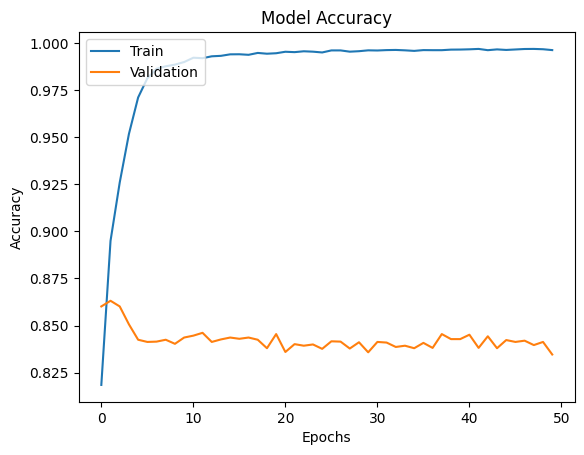

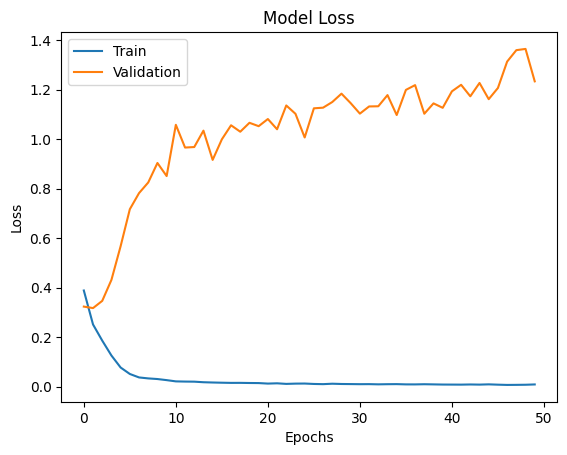

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
print("Training Time:", training_time)
print("Testing Time:", testing_time)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Training Time: 2298.9924449920654
Testing Time: 3.7670135498046875e-05
Accuracy: 0.8346666666666667
Precision: 0.8292020373514432
F1 Score: 0.8311776718856365
Confusion Matrix:
 [[2566  503]
 [ 489 2442]]


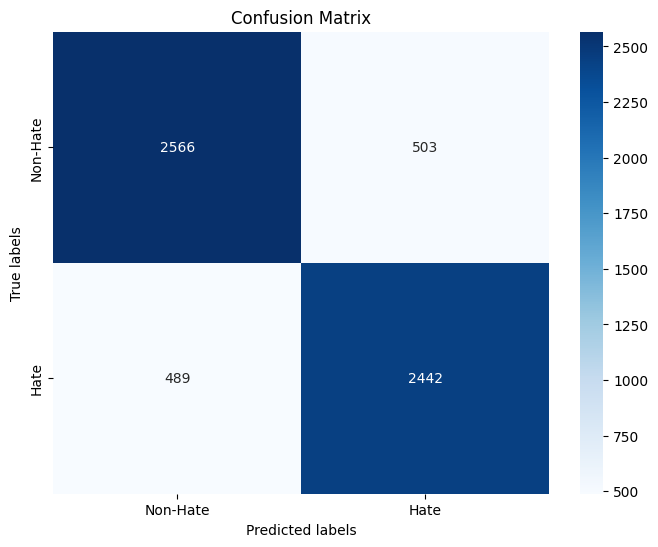

In [ ]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
# Take user input
user_input = input("Enter a sentence: ")

# Tokenize and pad the user input
user_input_sequence = tokenizer.texts_to_sequences([user_input])
user_input_sequence = pad_sequences(user_input_sequence, maxlen=100)

# Predict probabilities for each class
probabilities = model.predict(user_input_sequence)

# Threshold for classification
threshold = 0.5

# Determine the predicted class
if probabilities[0][0] > threshold:
    label = "Hate Speech"
else:
    label = "Non-Hate Speech"

# Print the prediction
print("Prediction:", label)


Enter a sentence: Allah apko hamesha salamat rakhy
1/1 [==============================] - 0s 29ms/step
Prediction: Non-Hate Speech


In [ ]:
# Save the model
model.save("hate_speech_detection_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("hate_speech_detection_model.h5")
